# Efectos Mixtos - Ej7 - guía ejercicios_mixtos.pdf

Ver PDF **ejercicios_mixtos.pdf**


## Análisis del ejercicio

- diseño de factores anidado es cuando no estan cruzados, el operario 1 de la maquina 1, no maneja la maquina 2
- por como esta expresado: las maquinas SON efecto fijo
- nos pide despsues que supongamos que son facroes cruzados los operarios, entonces seria un diseño en bloques

## Caso 1: operarios anidados
- Ajustamos el modelo donde el operario es el efecto aleatorio anidado en la maquina

- efecto fijo: maquina ($\alpha$), *i*
- efecto aleatorio: operario (B), anidado en maquina, *j(i)*

**Modelo:**

$$y_{ijk} = \mu + \alpha_i + B_{j(i)} + \epsilon_{ijk}$$

**Análisis exploratorio**

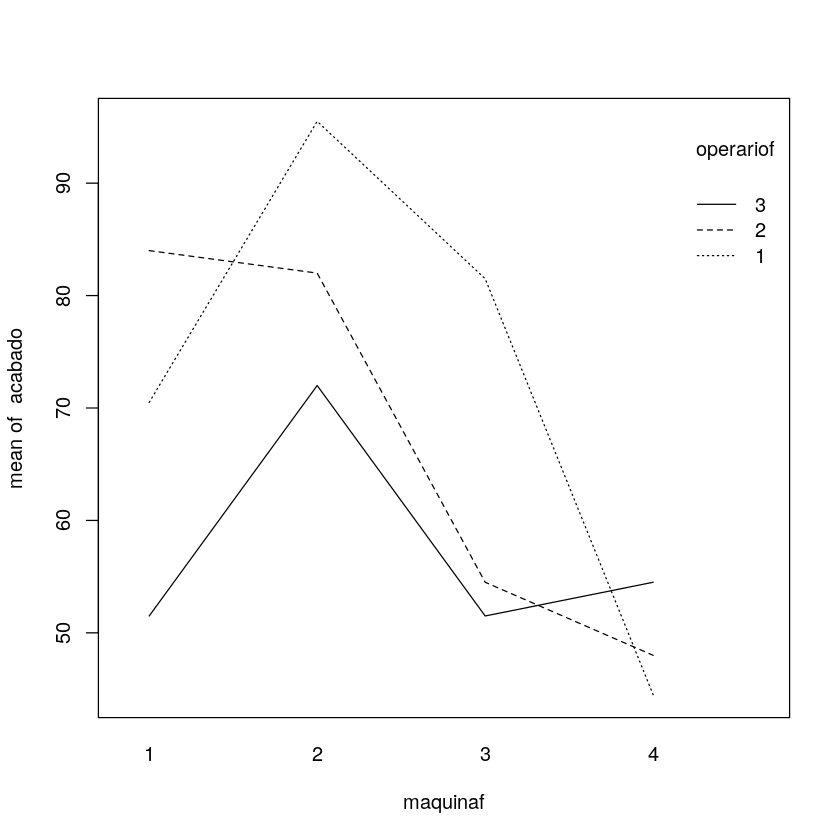

In [7]:
interaction.plot(maquinaf, operariof, acabado)

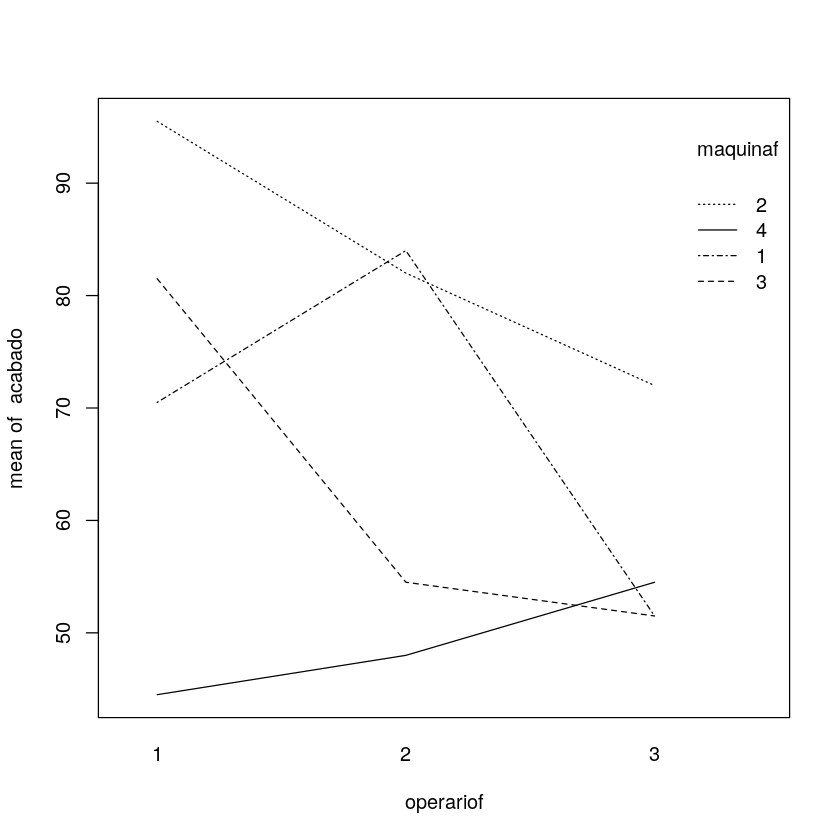

In [8]:
interaction.plot(operariof, maquinaf, acabado)

De los gráficos previos podemos inferir que la interacción no es fuerte, sin embargo, al estar anidados los operarios en las máquinas no tendría mucho sentido su análisis, sí para el item posterior donde supone que son cruzados.

In [4]:
datos = read.csv("datos/ej7_ejercicios_mixtos.csv", sep = ";")
str(datos)
attach(datos)
maquinaf = as.factor(maquina)
operariof = as.factor(operario)

'data.frame':	24 obs. of  3 variables:
 $ acabado : int  79 62 94 74 46 57 92 99 85 79 ...
 $ maquina : int  1 1 1 1 1 1 2 2 2 2 ...
 $ operario: int  1 1 2 2 3 3 1 1 2 2 ...


The following objects are masked from datos (pos = 3):

    acabado, maquina, operario



In [6]:
# Caso 1
library(lme4)
m0 = lmer(acabado~maquinaf + (1|operariof:maquinaf))
summary(m0)
confint(m0)

Loading required package: Matrix


Linear mixed model fit by REML ['lmerMod']
Formula: acabado ~ maquinaf + (1 | operariof:maquinaf)

REML criterion at convergence: 164.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.04636 -0.69740 -0.05224  0.72879  1.48805 

Random effects:
 Groups             Name        Variance Std.Dev.
 operariof:maquinaf (Intercept) 133.9    11.570  
 Residual                        84.5     9.192  
Number of obs: 24, groups:  operariof:maquinaf, 12

Fixed effects:
            Estimate Std. Error t value
(Intercept)   68.667      7.662   8.962
maquinaf2     14.500     10.835   1.338
maquinaf3     -6.167     10.835  -0.569
maquinaf4    -19.667     10.835  -1.815

Correlation of Fixed Effects:
          (Intr) maqnf2 maqnf3
maquinaf2 -0.707              
maquinaf3 -0.707  0.500       
maquinaf4 -0.707  0.500  0.500

Computing profile confidence intervals ...
Warning message in optwrap(optimizer, par = start, fn = function(x) dd(mkpar(npar1, :
“convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q”

,2.5 %,97.5 %
.sig01,0.000000,15.9615792
.sigma,6.457451,14.5914096
(Intercept),55.355693,81.9776400
maquinaf2,-4.324559,33.3245591
maquinaf3,-24.991226,12.6578924
maquinaf4,-38.491226,-0.8421076


La interacción del operario anidado en máquina no es significativa ya que el límite inferior del IC es cero. Veamos esto mismo haciento un test de anova, para el modelo completo (m0) respecto al modelo reducido (m1).

In [14]:
m0 = lmer(acabado~maquinaf + (1|operariof:maquinaf), REML = FALSE)
m1 = lm(acabado~maquinaf)
anova(m0, m1)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m1,5,199.8611,205.7514,-94.93054,189.8611,NA,NA,NA
m0,6,198.8552,205.9235,-93.42758,186.8552,3.00592,1,0.08296085


Corroboramos que como el pvalor es mayor a la significancia (0.05) confirma el resultado obtenido con los IC de la varianza.

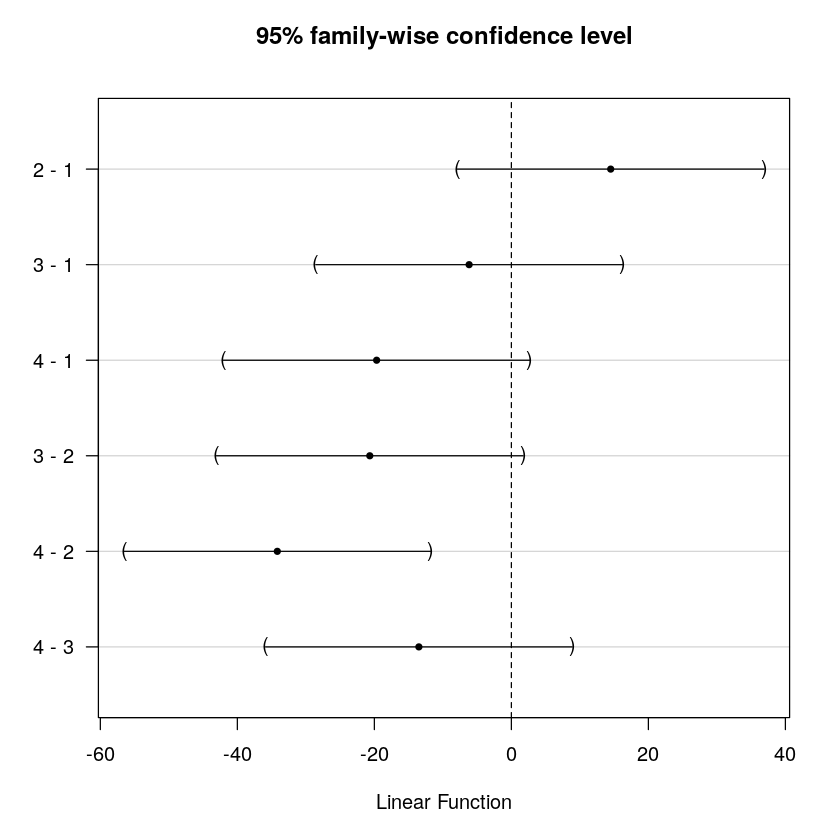

In [29]:
library(multcomp)
mc = glht(m0, linfct=mcp(maquinaf = "Tukey"))
plot(mc)

De las comparaciones múltiples previas usando el método de Tukey, observamos que salvo la máquina 4 con la 2, todas tienen un acabado estadísticamente equivalente. Ahora veamos cuál máquina es mejor, utilizando el método de Dunnet.

Para esto, debemos conocer el Error Cuadrático Medio (MSE), que obtendremos usando el paquete ``EMSaov``.

In [25]:
library(EMSaov)
datos$maquinaf = maquinaf
datos$operariof = operariof
mems = EMSanova(acabado~maquinaf+operariof, type = c("F", "R"), nested = c(NA, "maquinaf"), data=datos)
print(mems)

                    Df       SS        MS Fvalue Pvalue Sig
maquinaf             3 3617.667 1205.8889 3.4238 0.0728   .
operariof(maquinaf)  8 2817.667  352.2083 4.1681 0.0134   *
Residuals           12 1014.000   84.5000                  
                                                     EMS
maquinaf            Error+2operariof(maquinaf)+6maquinaf
operariof(maquinaf)           Error+2operariof(maquinaf)
Residuals                                          Error


In [26]:
source("mymultcomp.R")
maxHSU(acabado, maquinaf, alpha = 0.05, mse = 84.5, dof = 12)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "2"


[1] NA  "2"

<font color='red'> **PREGUNTAS:**
- Acá vemos que la mejor es la máquina 2 y que no hay ninguna estadísticamente equivalente, sin embargo, en las comparaciones múltiples vemos que la máquina 2 es equivalente a la 1 y a la 3
</font>

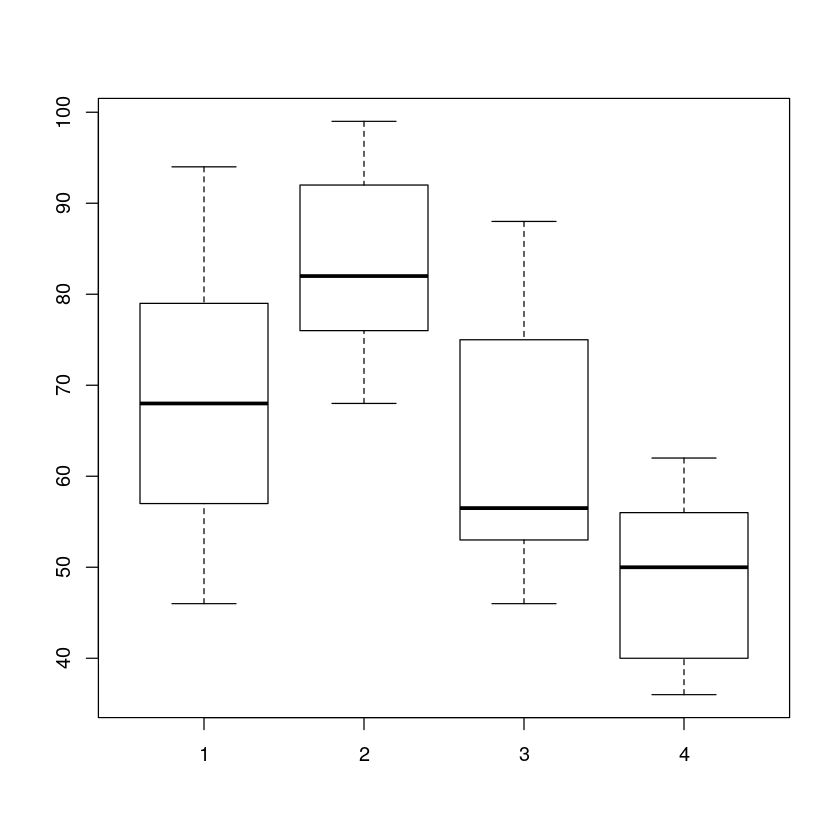

In [30]:
boxplot(acabado~maquinaf)

## Caso 2: operarios cruzados

- Cruzados, maquina siguie siendo fija pero consideras al operario como un factor aleatorio puede tener una interaccion con la maquina

**Modelo**

$$y_{ijk} = \mu + \alpha_i + B_j + (\alpha B)_{ij} + \epsilon_{ijk}$$

In [31]:
# Caso 2
m2 = lmer(acabado~maquinaf + (1|operariof) + (1|operariof:maquinaf))
summary(m2)
confint(m2)

Linear mixed model fit by REML ['lmerMod']
Formula: acabado ~ maquinaf + (1 | operariof) + (1 | operariof:maquinaf)

REML criterion at convergence: 163.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.14581 -0.64737 -0.09323  0.67797  1.53696 

Random effects:
 Groups             Name        Variance Std.Dev.
 operariof:maquinaf (Intercept) 109.51   10.465  
 operariof          (Intercept)  24.35    4.934  
 Residual                        84.50    9.192  
Number of obs: 24, groups:  operariof:maquinaf, 12; operariof, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)   68.667      7.662   8.962
maquinaf2     14.500     10.058   1.442
maquinaf3     -6.167     10.058  -0.613
maquinaf4    -19.667     10.058  -1.955

Correlation of Fixed Effects:
          (Intr) maqnf2 maqnf3
maquinaf2 -0.656              
maquinaf3 -0.656  0.500       
maquinaf4 -0.656  0.500  0.500

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.000000,15.576555
.sig02,0.000000,18.359945
.sigma,6.457489,14.559410
(Intercept),55.212718,82.120989
maquinaf2,-3.478975,32.478814
maquinaf3,-24.145641,11.812148
maquinaf4,-37.645641,-1.687852


Observamos que no es significativa la interacción entre el operario y las máquinas, y tampoco es significativo el efecto individual del operario en la variabilidad de la respuesta. Por lo tanto, las conclusiones no varían del apartado previo. 

Aun así, veamos las comparaciones múltiples para el modelo completo usando Tukey.

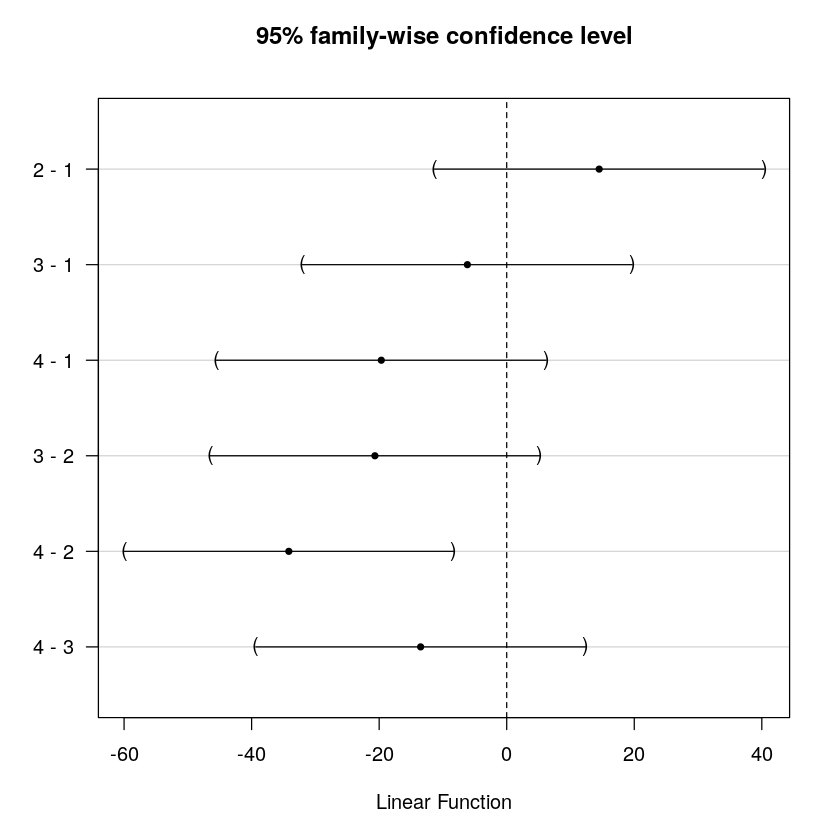

In [32]:
library(multcomp)
mc2 = glht(m2, linfct=mcp(maquinaf = "Tukey"))
plot(mc2)